In [203]:
!pip3 install pandas numpy matplotlib yfinance PyPortfolioOpt
!pip3 install pandas-datareader
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import yfinance as yf

import pypfopt

In [205]:
tickers = ['AAPL', 'NVDA', 'MAR', 'LMT', 'BA']

# Historical data - define START, END dates
start_date = '2010-03-31'
end_date = '2023-10-20'

In [206]:
merged = pd.read_excel("merged.xlsx", index_col=0)

In [207]:
pred = pd.read_excel("predictions.xlsx", index_col=0)
# pred

# stock price cannot be negative
pred.mask(pred < 0, 0, inplace=True)

# merged

In [208]:
# merged = merged[60:]
# pred = pred[:60]
pred = pred[60:]
merged = merged[60:]

In [209]:
DateList = merged.index.to_list()
pred["Date"] = DateList

pred.set_index("Date", inplace = True)

pred = pred.drop('2010-05-19')
merged = merged.drop('2010-05-19')

In [210]:
merged

,AAPL_Adj Close,AAPL_Close,AAPL_Daily_Return,AAPL_High,AAPL_Low,AAPL_Lower_Bollinger,AAPL_MACD,AAPL_Open,AAPL_RSI,AAPL_SMA,...,NVDA_Low,NVDA_Lower_Bollinger,NVDA_MACD,NVDA_Open,NVDA_RSI,NVDA_SMA,NVDA_Sentiment_score,NVDA_Upper_Bollinger,NVDA_Volatility,NVDA_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-31,7.123828,8.392857,-0.003604,8.450357,8.373571,7.662489,0.258526,8.410357,67.197679,8.135663,...,4.327500,4.194643,0.083478,4.390000,52.799991,4.374286,0.206336,4.553929,0.089821,38984000
2010-04-01,7.153231,8.427500,0.004127,8.526071,8.312500,7.728088,0.244309,8.478929,67.042537,8.159566,...,4.260000,4.213841,0.065785,4.370000,49.612394,4.373750,0.206132,4.533659,0.079954,33966400
2010-04-05,7.229624,8.517500,0.010680,8.518214,8.384643,7.801829,0.236953,8.392143,76.880703,8.196939,...,4.327500,4.243294,0.042484,4.332500,53.960395,4.379464,0.205928,4.515634,0.068085,41363600
2010-04-06,7.261456,8.555000,0.004403,8.580000,8.464286,7.822482,0.233301,8.507143,77.248093,8.235434,...,4.187500,4.227140,0.025769,4.315000,40.826854,4.366786,0.205723,4.506431,0.069823,80926000
2010-04-07,7.293587,8.592857,0.004425,8.640000,8.523571,7.851891,0.244494,8.555357,78.993635,8.277474,...,4.200000,4.219055,0.020913,4.235000,37.087896,4.350000,0.205519,4.480945,0.065472,81746800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-13,178.850006,178.850006,-0.010293,181.929993,178.139999,168.908091,0.159168,181.419998,56.385427,175.231431,...,452.799988,412.050112,7.717500,469.600006,65.667010,445.742859,0.259574,479.435606,16.846373,47411500
2023-10-16,178.720001,178.720001,-0.000727,179.080002,176.509995,169.243311,0.807565,176.750000,69.095967,175.714288,...,449.119995,413.739918,10.021346,450.630005,69.624771,448.731432,0.259574,483.722946,17.495757,37509900
2023-10-17,177.149994,177.149994,-0.008785,178.419998,174.800003,169.771621,1.387564,176.649994,68.940197,176.194288,...,424.799988,414.788621,10.864103,440.000000,55.995109,449.781433,0.259574,484.774245,17.496406,81233300


In [211]:
stockList = []
for stock in tickers:
    stockList.append(f"{stock}_Adj Close")

prices = merged[stockList]
prices.columns = prices.columns.str.replace("_Adj Close", "")
prices


,AAPL,NVDA,MAR,LMT,BA
Date,,,,,
2010-03-31,7.123828,3.990801,25.745432,54.341084,56.966690
2010-04-01,7.153231,3.949517,26.080320,54.772049,57.264835
2010-04-05,7.229624,4.009152,26.496889,54.745926,56.519505
2010-04-06,7.261456,3.910527,26.709255,53.883991,56.770554
2010-04-07,7.293587,3.935758,26.423382,53.668503,56.566563
...,...,...,...,...,...
2023-10-13,178.850006,454.609985,192.929993,441.059998,184.910004
2023-10-16,178.720001,460.950012,197.039993,440.410004,184.929993
2023-10-17,177.149994,439.380005,197.509995,441.130005,185.600006


In [212]:
#SP500 ETF Benchmark
market_prices = yf.download("SPY", start=start_date, end=end_date)["Adj Close"]
market_prices


[*********************100%%**********************]  1 of 1 completed


Date
2010-03-31     90.688141
2010-04-01     91.308205
2010-04-05     92.052307
2010-04-06     92.269356
2010-04-07     91.742279
                 ...    
2023-10-13    431.500000
2023-10-16    436.040009
2023-10-17    436.019989
2023-10-18    430.209991
2023-10-19    426.429993
Name: Adj Close, Length: 3413, dtype: float64

In [213]:
# mcaps = {}
# for t in tickers:
#     stock = yf.Ticker(t)
#     mcaps[t] = stock.info["marketCap"]
# mcaps

# this should return a dictionary of marketcaps of our 5 stocks
# however, YFinance returned error 404 due to technical issues
# hence, we will manually pull the market cap from yfinance

# tickers = ['AAPL', 'NVDA', 'MAR', 'LMT', 'BA']

mcaps = {
    'AAPL': 2.76 * 1000000000000,
    'NVDA': 1.112 * 1000000000000,
    'MAR': 57.053 * 1000000000,
    'LMT': 113.639 * 1000000000,
    'BA': 118.001 * 1000000000
}


In [214]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta
     

3.6020689215904995

In [215]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior


AAPL    0.428226
NVDA    0.446357
MAR     0.233701
LMT     0.153651
BA      0.371139
dtype: float64

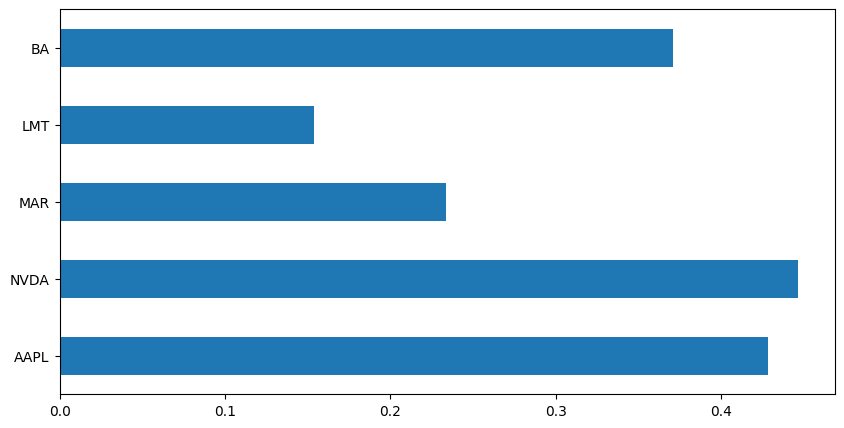

In [216]:
market_prior.plot.barh(figsize=(10,5));

In [217]:
tickers = ['AAPL', 'NVDA', 'MAR', 'LMT', 'BA']

confidence = []
for ticker in tickers:
    confidencel_level = (pred[f'{ticker}'].iloc[-1] - prices[f'{ticker}'].iloc[-1])/ prices[f'{ticker}'].iloc[-1]
    confidence.append(confidencel_level)

viewdict = {}
for i in range(5):
    viewdict[tickers[i]] = confidence[i]

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

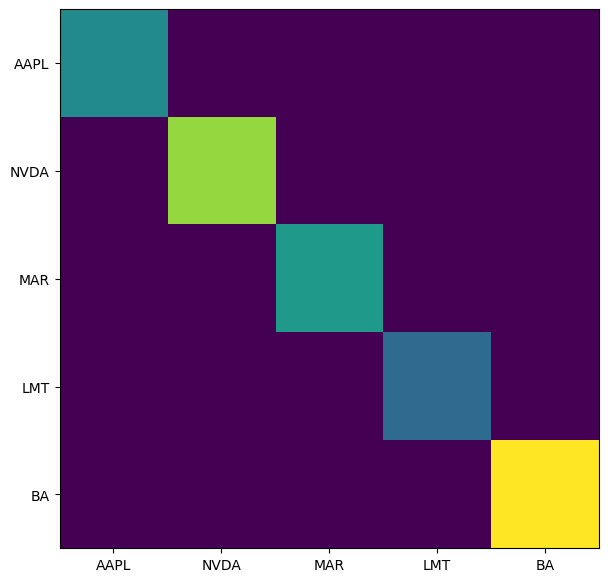

In [218]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(bl.omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [221]:
omega = bl.omega

In [222]:
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta, absolute_views=viewdict, omega=omega)

In [223]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

AAPL    0.141906
NVDA    0.117765
MAR     0.009882
LMT     0.002511
BA      0.050018
dtype: float64

In [224]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T
rets_df


,Prior,Posterior,Views
AAPL,0.428226,0.141906,-0.027481
NVDA,0.446357,0.117765,-0.029242
MAR,0.233701,0.009882,-0.049147
LMT,0.153651,0.002511,-0.036197
BA,0.371139,0.050018,-0.006733


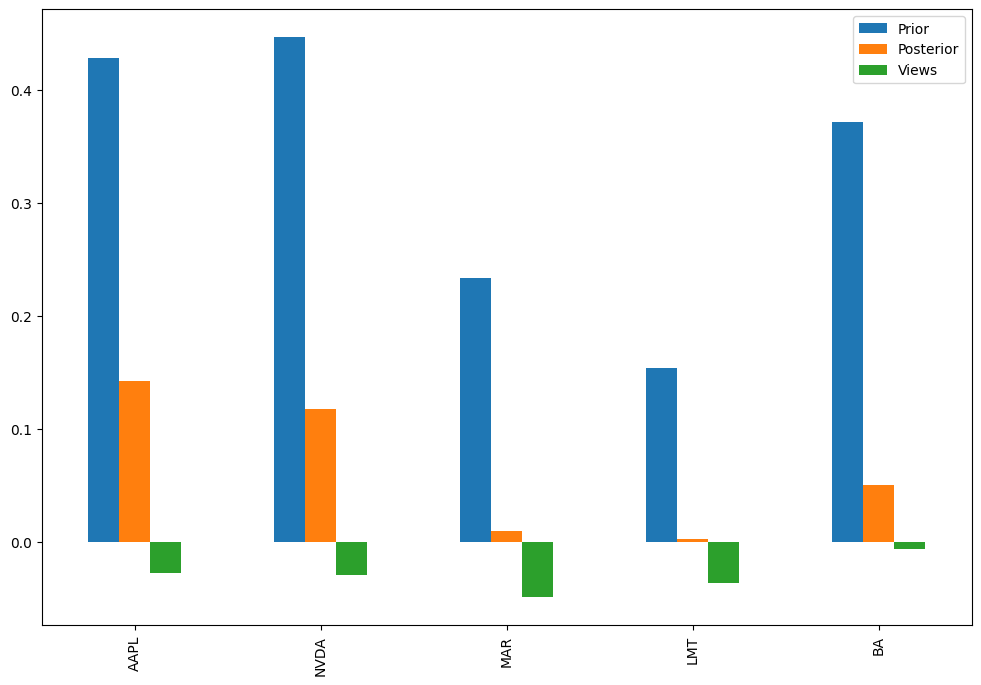

In [225]:
rets_df.plot.bar(figsize=(12,8));

In [228]:
S_bl = bl.bl_cov()

In [226]:
from pypfopt import EfficientFrontier, objective_functions

In [229]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/Users/estherwee/Library/Python/3.9/lib/python/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.55383),
             ('NVDA', 0.39027),
             ('MAR', 0.0),
             ('LMT', 0.0),
             ('BA', 0.0559)])

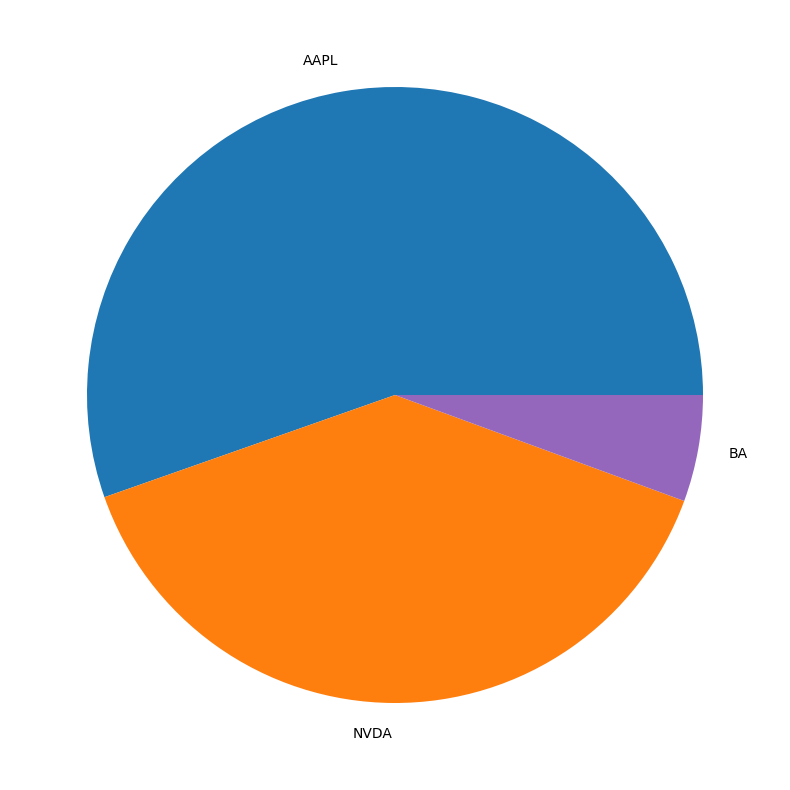

In [230]:
pd.Series(weights).plot.pie(figsize=(10,10));